In [ ]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
from matplotlib import pyplot as plt
from QuadUtils import K_xi_from_Intrinsic
from fisheye_undist import FisheyeUndist
from transformations import quaternion_from_matrix, quaternion_matrix, euler_from_matrix, euler_matrix, quaternion_from_euler

In [21]:
arucoParams = cv2.aruco.DetectorParameters()
arucoParams.markerBorderBits = 2
arucoParams.adaptiveThreshWinSizeStep = 1
arucoParams.adaptiveThreshWinSizeMin = 3
detector_opencv = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_APRILTAG_36h11)


In [ ]:

image_gray = cv2.imread('sample_data/image_170_0.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image_gray, cmap='gray')
intrinsic_init = np.array([1.4427025149556625, 892.2339790689094, 891.2279591983017, 640.631425314267, 366.1326580689927])
D_init = np.array([-0.34787797,  0.12383196, -0.00235618,  0.00283412])

K, xi = K_xi_from_Intrinsic(intrinsic_init)
new_size = (1280, 720)
Knew = np.array([[200, 0.0, 640],
                [0.0, 200, 360],
                [0.0, 0.0, 1.0]], dtype=np.float64)
R = np.eye(3)
map1, map2 = cv2.omnidir.initUndistortRectifyMap(K, D_init, xi, R,
                                                            Knew, new_size, cv2.CV_16SC2,
                                                            cv2.omnidir.RECTIFY_PERSPECTIVE)
image_undist = cv2.remap(image_gray, map1, map2, interpolation=cv2.INTER_LINEAR)

image_combined = np.hstack((image_gray, image_undist))
plt.imshow(image_combined, cmap='gray')
plt.show()



Detector detect 14 markers on raw image


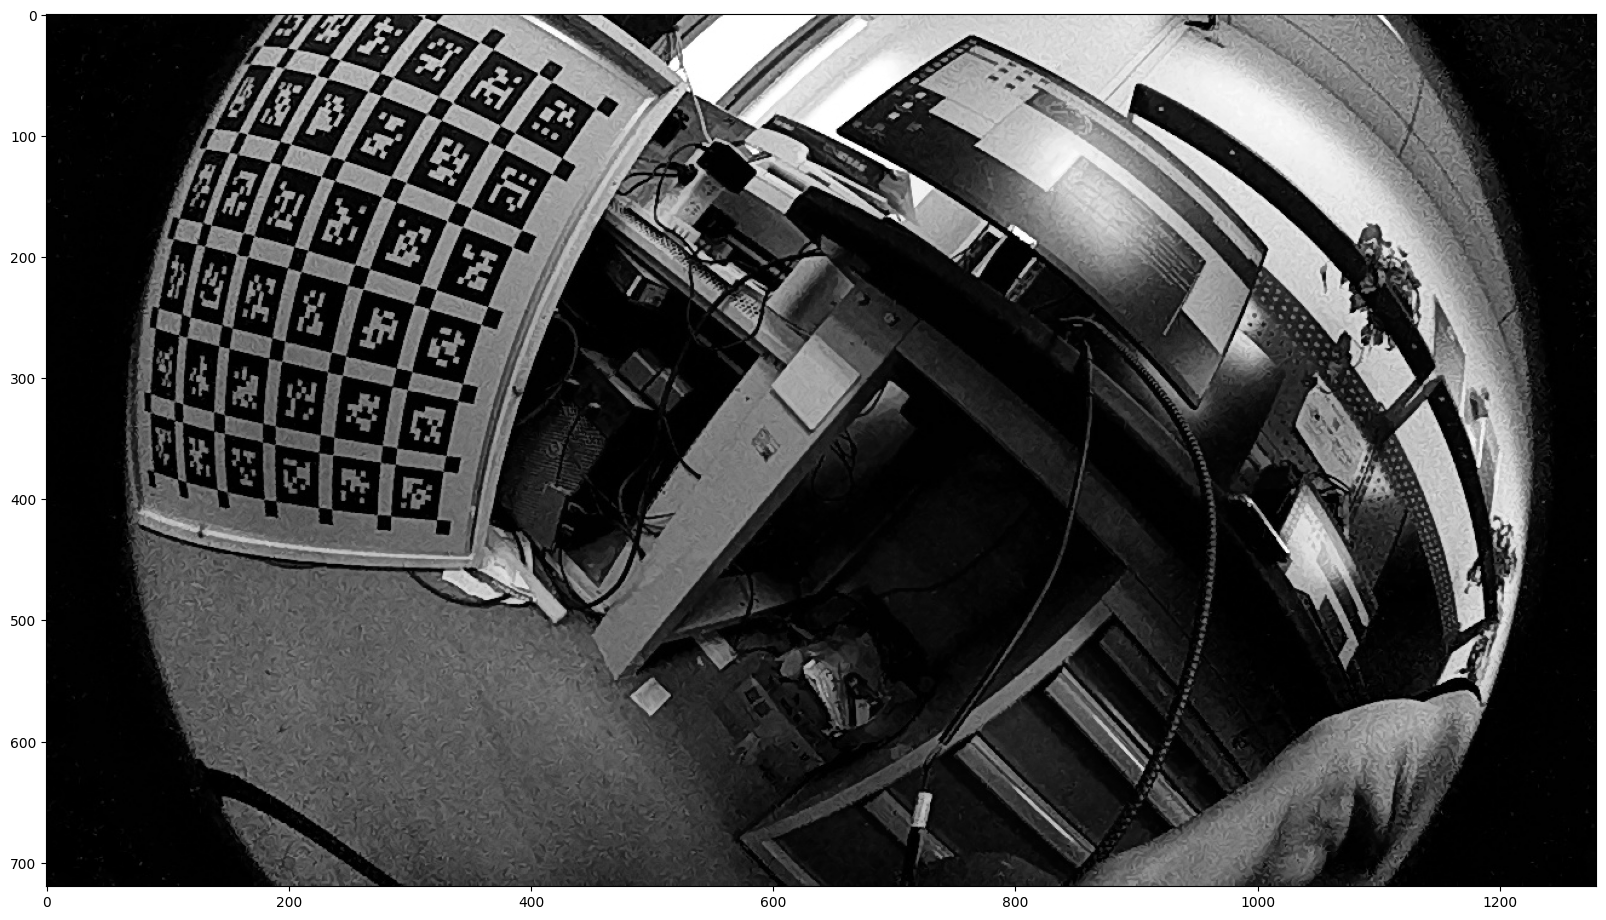

Try 5 image undist
fcenter 252.07471375549565 fside 360.0 width 720 sideImgHeight 504
Detector detect 3 markers on image 0
Detector detect 12 markers on image 4
Detector detect 15 on undistorted image


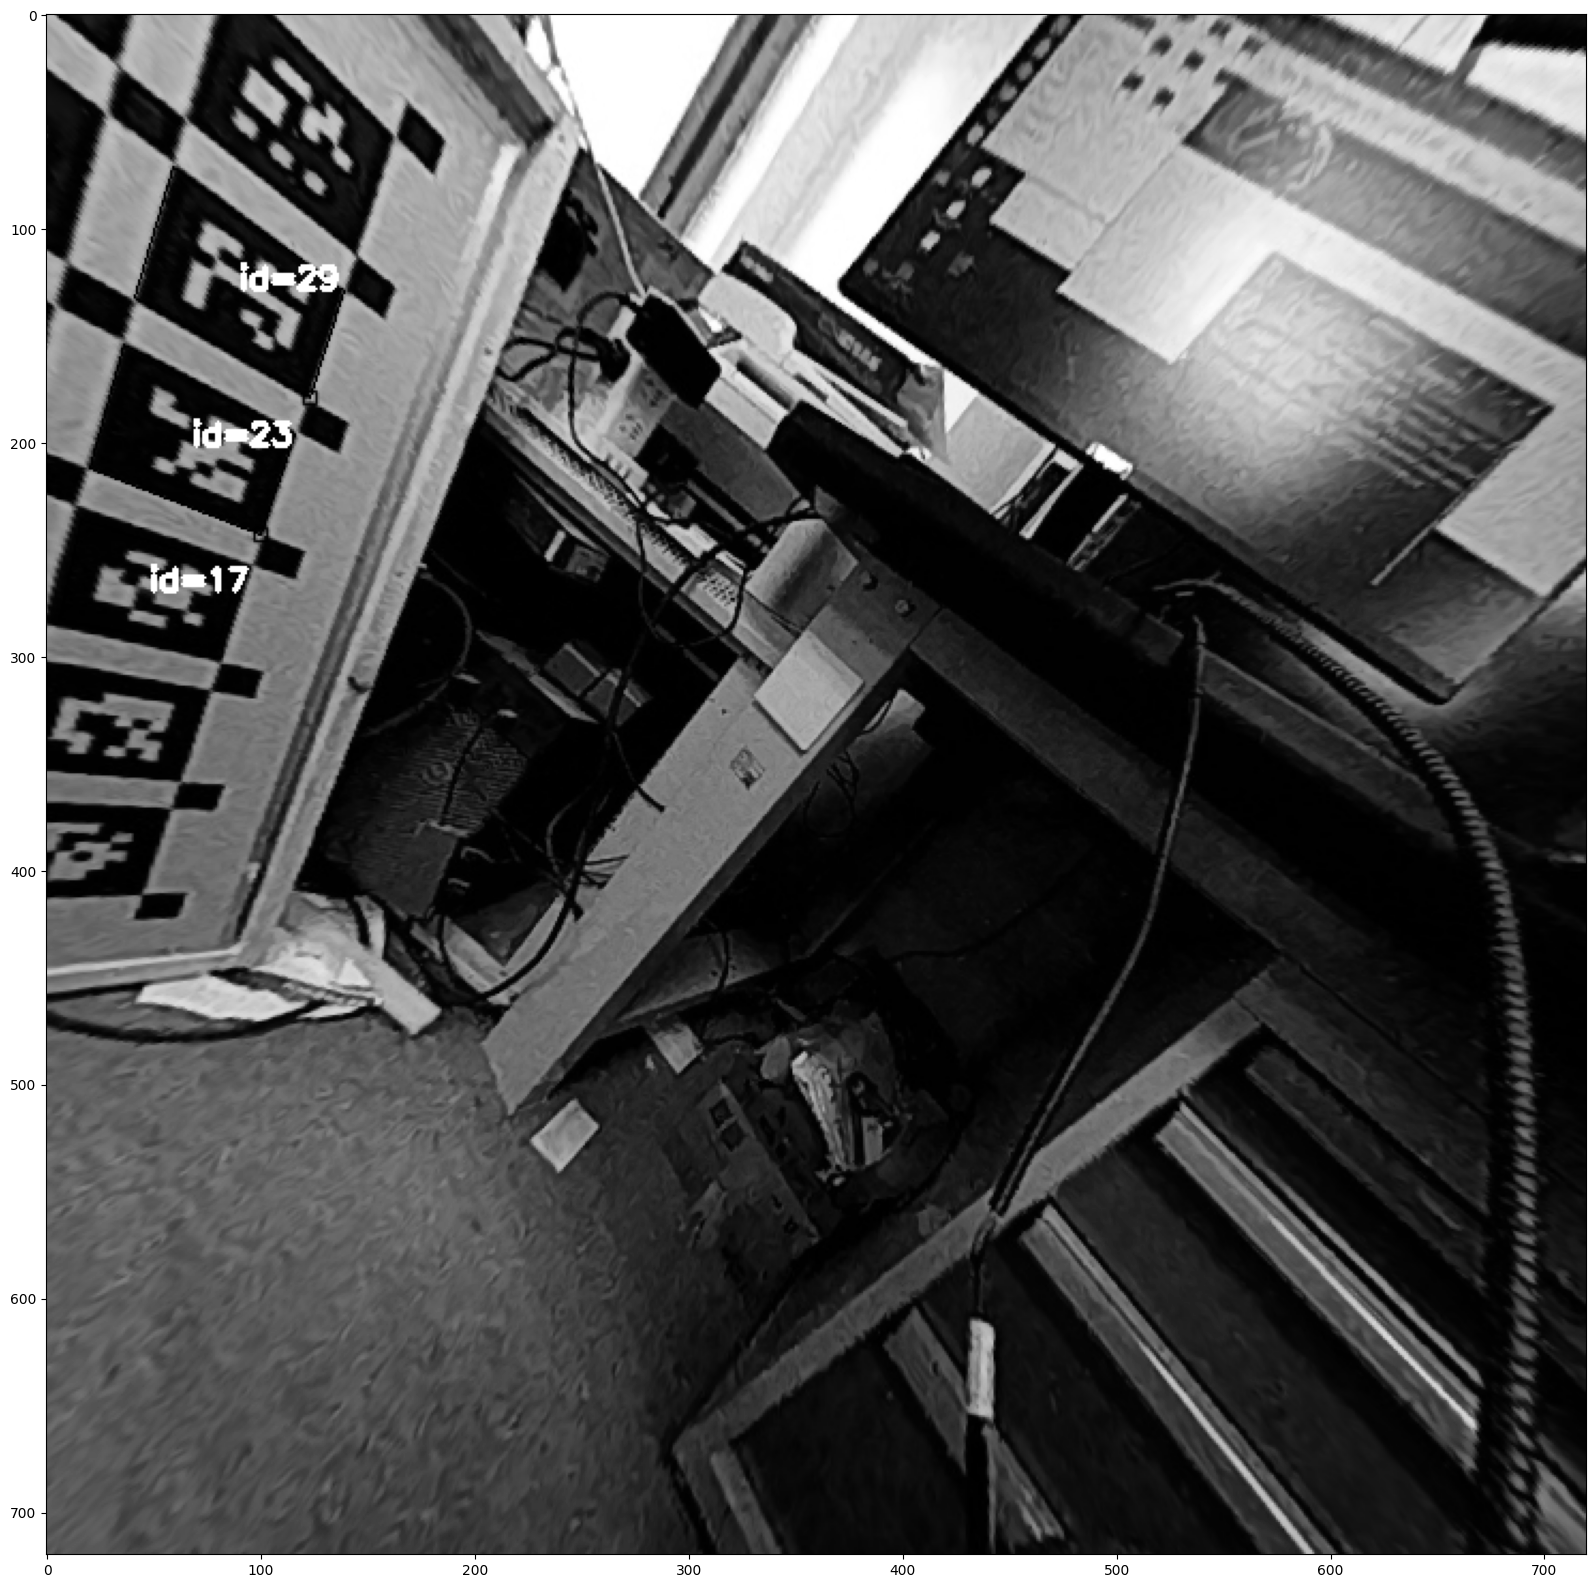

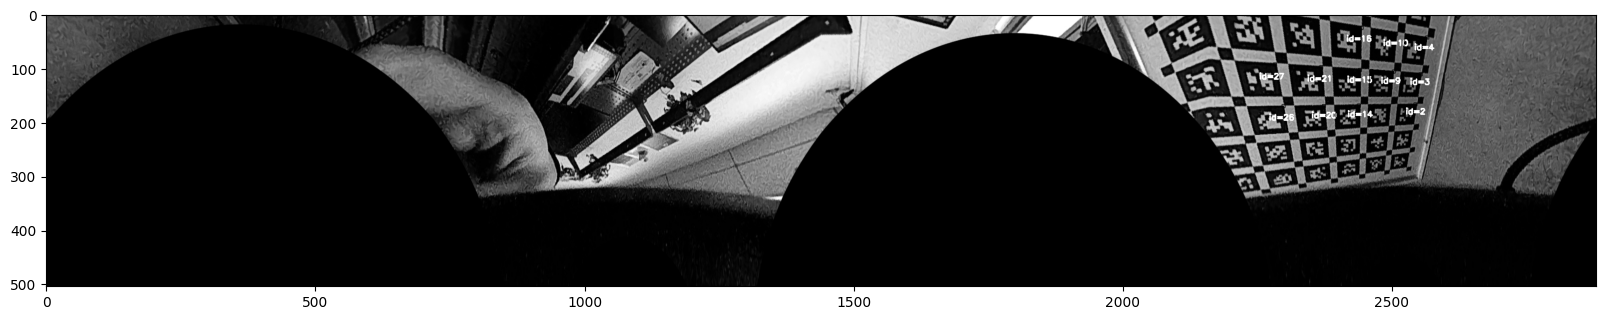

In [ ]:
intrinsic_init = np.array([1.4427025149556625, 892.2339790689094, 891.2279591983017, 640.631425314267, 366.1326580689927])
D_init = np.array([-0.34787797,  0.12383196, -0.00235618,  0.00283412])
K, xi = K_xi_from_Intrinsic(intrinsic_init)


image_gray = cv2.imread('sample_data/image_170_0.png', cv2.IMREAD_GRAYSCALE)
marker_corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(image_gray, detector_opencv,
                                                                parameters=arucoParams)
img_color = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)
cv2.aruco.drawDetectedMarkers(img_color, marker_corners, ids, (0, 255, 0))
print(f"Detector detect {len(ids)} markers on raw image")
plt.imshow(img_color)
plt.show()

print("Try 5 image undist")
fisheye_undist = FisheyeUndist(K, D_init, xi[0], fov=250, width=720, height=720, mode="FISHEYE_5")
imgs = fisheye_undist.undistAll(image_gray)
# Concatenate the all the images

count_detected = 0
for i in range(len(imgs)):
    marker_corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(imgs[i], detector_opencv,
                                                                parameters=arucoParams)
    if ids is not None:
        print(f"Detector detect {len(ids)} markers on image {i}")
        count_detected += len(ids)
        cv2.aruco.drawDetectedMarkers(imgs[i], marker_corners, ids, (0, 255, 0))
print(f"Detector detect {count_detected} on undistorted image")
image_combined = np.hstack(imgs[1:])
plt.rc('figure', figsize=(20, 20))
plt.imshow(imgs[0], cmap='gray')
plt.show()
plt.imshow(image_combined, cmap='gray')
plt.show()
